<a href="https://colab.research.google.com/github/linkwine/machine-learning/blob/master/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

![heart](https://www.worldkidneyday.org/wp-content/uploads/2018/06/Cardiovascular.png)


Data source: UCI Heart disease data (https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

The Cleveland data is used in this project.


###Attribute Information:
1. age 
2. sex (1= male, 0 =female)
3. cp: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
-- Value 3: non-anginal pain 
-- Value 4: asymptomatic 
4. resting blood pressure (in mm Hg on admission to the hospital)  
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl (1 = true; 0 = false)  
7. resting electrocardiographic results 
-- Value 0: normal 
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. maximum heart rate achieved 
9. exercise induced angina (1 = yes; 0 = no)  
10. ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment 
-- Value 1: upsloping 
-- Value 2: flat 
-- Value 3: downsloping 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. num: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 


# 1. Ingest

## 1.1 Load Library

In [0]:
!pip3 install seaborn==0.9.0


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##1.2 Load data from Google Drive

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 3.5MB/s 

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [0]:
id = '1Ih0M_0syAizD_JHMtChBlXh0JygyId2w'

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('processed.cleveland.data')  
df = pd.read_csv('processed.cleveland.data', header = None)
# Dataset is now stored in a Pandas Dataframe

# 2. Data Cleaning

In [0]:
#assign column name

df.columns = ['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 'electrocardiography', 'max_heart_rate',
              'exercise_induced_angina', 'ST_depresion','slope', 'flourosopy', 'thal', 'diagnosis']

In [0]:
#view data

df.head()

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,electrocardiography,max_heart_rate,exercise_induced_angina,ST_depresion,slope,flourosopy,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
df.electrocardiography.value_counts()

0.0    151
2.0    148
1.0      4
Name: electrocardiography, dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null float64
sex                        303 non-null float64
chest_pain                 303 non-null float64
blood_pressure             303 non-null float64
cholesterol                303 non-null float64
blood_sugar                303 non-null float64
electrocardiography        303 non-null float64
max_heart_rate             303 non-null float64
exercise_induced_angina    303 non-null float64
ST_depresion               303 non-null float64
slope                      303 non-null float64
flourosopy                 303 non-null object
thal                       303 non-null object
diagnosis                  303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [0]:
# replace '?' with most frequent values

df.flourosopy.replace('?', '0.0', inplace=True)
df.thal.replace('?', '3.0', inplace=True)

In [0]:
# convert string to float

df.flourosopy = df.flourosopy.astype('float')
df.thal = df.thal.astype('float')


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null float64
sex                        303 non-null float64
chest_pain                 303 non-null float64
blood_pressure             303 non-null float64
cholesterol                303 non-null float64
blood_sugar                303 non-null float64
electrocardiography        303 non-null float64
max_heart_rate             303 non-null float64
exercise_induced_angina    303 non-null float64
ST_depresion               303 non-null float64
slope                      303 non-null float64
flourosopy                 303 non-null float64
thal                       303 non-null float64
diagnosis                  303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


# 3. EDA

In [0]:
sns.set(color_codes=True)

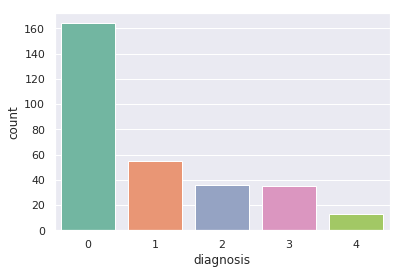

In [0]:
#a count of number of people fall in each diagnosis category
sns.countplot(df.diagnosis, palette='Set2')

#around half of the people (160 people) in this dataset were not diagnosed as having heart disease

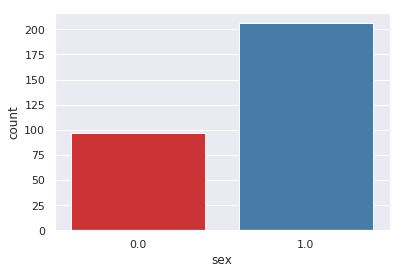

In [0]:
sns.countplot(df.sex, palette='Set1')

# dataset includes roughly 100 females, 200 males

In [0]:
# change the variable to binary

# add column 'heart_disease', set value to 0
df['heart_disease'] = 0
# Set value (1) for all items when diagnosis = 1,2,3 or 4
df.loc[df['diagnosis'] != 0, 'heart_disease'] = 1
 
df[['sex', 'heart_disease']].groupby(['sex'], as_index=False).mean()

# 25% of women(0) have heart disease, 55% of men have heart disease
# a higher percentage of men have heart disease

,sex,heart_disease
0,0.0,0.257732
1,1.0,0.553398


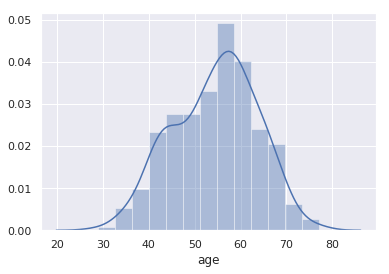

In [0]:
sns.distplot(df.age)
#majority of people are from 35 to 75

In [0]:
#convert age into 4 subgroups


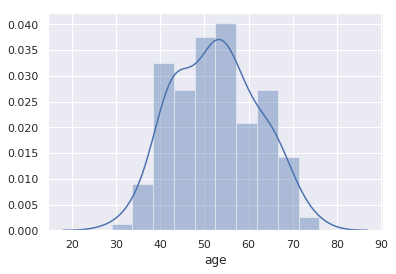

In [0]:
sns.distplot(df[df['diagnosis'] == 0]['age'])

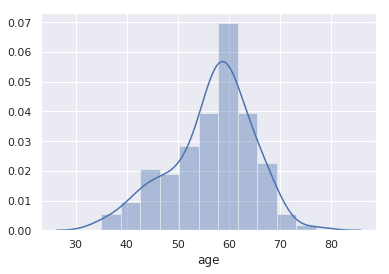

In [0]:
sns.distplot(df[df['diagnosis'] != 0]['age'])

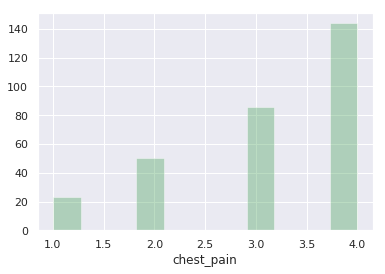

In [0]:
sns.distplot(df.chest_pain, kde = False, color = 'g')

#4. Modeling

## 4.1 Preprocessing

In [0]:
# standardized all features

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(df.drop(['diagnosis'],axis = 1),),
        columns=['age', 'sex', 'chest_pain', 'blood_pressure', 'cholesterol', 'blood_sugar', 
                 'electrocardiography', 'max_heart_rate', 'exercise_induced_angina', 
                 'ST_depresion','slope', 'flourosopy', 'thal'])

In [0]:
y = df.diagnosis

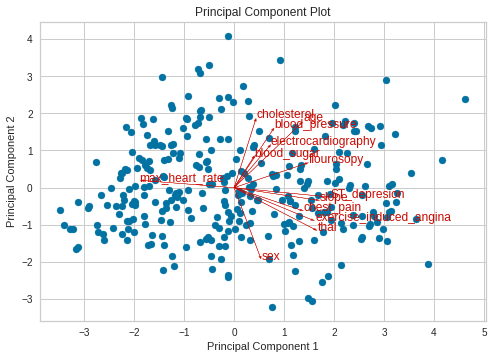

In [0]:
# dimensionality reduction

from yellowbrick.features.pca import PCADecomposition

visualizer = PCADecomposition(proj_features=True)
visualizer.fit_transform(X, y)
visualizer.poof()


Text(0.5, 1.0, 'Explained Variance')

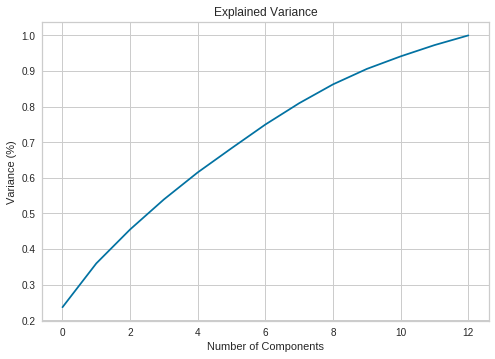

In [0]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')

## 4.2 Modeling with 10 Principal Components

After running models with different number of principal components, we found that using 10 components to train the model leads to the highest accuracy score. 

In [0]:
# dimension reduction - retain 10 components
pca = PCA(n_components = 10)
principal_component = pca.fit_transform(X)


In [0]:
# split data into training and test set

from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(principal_component,y,test_size=0.2,random_state=7)

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X_train,y_train)
prediction_lr=lr.predict(X_test)

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_lr,y_test))

The accuracy of the Logistic Regression is 0.5737704918032787


In [0]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
prediction_rfc=rfc.predict(X_test)

print('The accuracy of the Random Forest is',metrics.accuracy_score(prediction_rfc,y_test))

The accuracy of the Random Forest is 0.639344262295082


In [0]:
from sklearn import svm

svc=svm.SVC(gamma='scale')
svc.fit(X_train,y_train)
prediction_svc=svc.predict(X_test)

print('The accuracy of the SVC is',metrics.accuracy_score(prediction_svc,y_test))

The accuracy of the SVC is 0.5409836065573771


## 4.3 GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200, 300, 400],'max_depth' :[2,3,4,5, 6, 7, 8, 9, 10]}
RF = RandomForestClassifier()

clf_RF = GridSearchCV(RF, parameters, cv=5)
clf_RF.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200, 300, 400], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
clf_RF.best_params_

{'max_depth': 7, 'n_estimators': 200}

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, max_depth=7)
RF.fit(X_train,y_train)
prediction_RF=RF.predict(X_test)
print('The accuracy of the Random Forest Regression is',metrics.accuracy_score(prediction_RF,y_test))

The accuracy of the Random Forest Regression is 0.639344262295082


In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1, 1, 10,100]}
SVC = svm.SVC(kernel='rbf',gamma='scale')

clf_SVC = GridSearchCV(SVC, parameters, cv=5)
clf_SVC.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [0]:
clf_SVC.best_params_

{'C': 1}

In [0]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
SVC=svm.SVC(C = 1, kernel='rbf', gamma ='scale')
SVC.fit(X_train,y_train)
prediction_SVC=SVC.predict(X_test)
print('The accuracy of the SVC is',metrics.accuracy_score(prediction_SVC,y_test))

The accuracy of the SVC is 0.5409836065573771


# 5. Evaludation

Using GridSearchCV tuning hyperparameter of RandomForest Classifier, we are able to improve model accuracy up to 63%. 

##5.1 Confusion Matrix

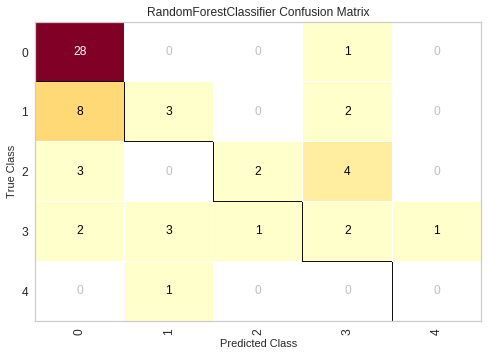

In [0]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(RF)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

From above consuion matrix, we see that among 29 patients who don't have heart disease, only 1 is predicted as having heart disease, the rest 28 are correctly classified as no heart disease. However, among those who do have heart disease, 13 out of 33 patients are predicted as no disease. The error rate is approximately 40%, which is unacceptably high. 

## 5.2 Precision& Recall

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


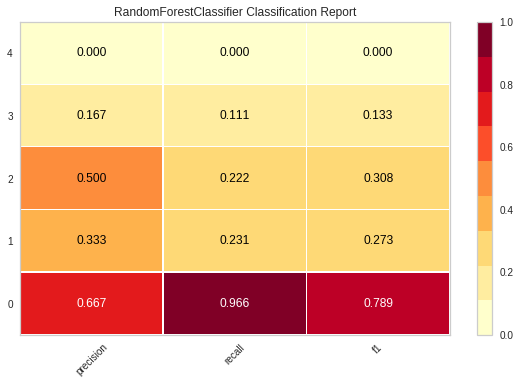

In [0]:
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RF)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

##5.3 ROC AUC

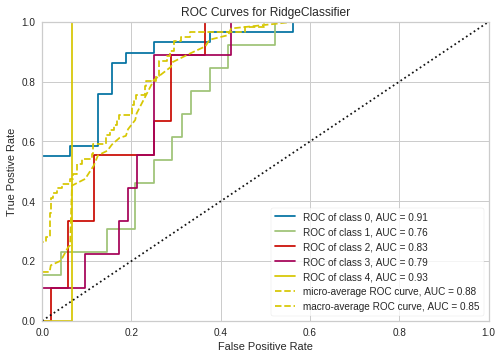

In [0]:
from sklearn.linear_model import RidgeClassifier

classes = ['0', '1', '2', '3', '4']
visualizer = ROCAUC(RidgeClassifier(), classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

# 6. AutoML

In [0]:
# install H2O
! pip install h2o

     |████████████████████████████████| 121.8MB 245kB/s 
  Stored in directory: /root/.cache/pip/wheels/36/73/57/2ea67a8a35ea9114f7d66cc8c5ec46c915698c909321f8a17d
Successfully built h2o


In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.2" 2019-01-15; OpenJDK Runtime Environment (build 11.0.2+9-Ubuntu-3ubuntu118.04.3); OpenJDK 64-Bit Server VM (build 11.0.2+9-Ubuntu-3ubuntu118.04.3, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpb7sr7z2j
  JVM stdout: /tmp/tmpb7sr7z2j/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpb7sr7z2j/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,1 day
H2O cluster name:,H2O_from_python_unknownUser_7wo1gm
H2O cluster total nodes:,1
H2O cluster free memory:,3 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os;os.listdir("/content/gdrive/My Drive/ApplicationDomainHW")

['paper1.gdoc',
 'paper2.gdoc',
 'paper3.gdoc',
 'paper4.gdoc',
 'Machine Learning Canvas Template.docx',
 'short paper 5.gdoc',
 'short paper 6.gdoc',
 'Individual_project.gdoc',
 'processed.cleveland.data',
 'example_feature_types.ipynb',
 'paper_8.gdoc',
 'paper_7.gdoc',
 'heart_disease_prediction.ipynb']

In [0]:
df_automl = h2o.import_file("/content/gdrive/My Drive/ApplicationDomainHW/processed.cleveland.data", destination_frame="df_automl")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [0]:
train, test = df_automl.split_frame(ratios=[0.8], seed=7)
train[df_automl.columns[-1]] = train[df_automl.columns[-1]].asfactor()
test[df_automl.columns[-1]] = test[df_automl.columns[-1]].asfactor()
print("Number of rows in train and test set : ", train.shape[0], test.shape[0])

Number of rows in train and test set :  244 59


In [0]:
x = df_automl.columns[:-1]
y = df_automl.columns[-1]

In [0]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame = train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,mean_per_class_error,logloss,rmse,mse
DeepLearning_grid_1_AutoML_20190508_220623_model_2,0.608626,1.57057,0.587232,0.344841
DeepLearning_grid_1_AutoML_20190508_220623_model_3,0.63338,1.80922,0.573168,0.328522
GBM_grid_1_AutoML_20190508_220623_model_1,0.633645,1.02899,0.587358,0.344989
XGBoost_grid_1_AutoML_20190508_220623_model_1,0.64854,1.06324,0.6266,0.392627
XGBoost_grid_1_AutoML_20190508_220623_model_4,0.658532,0.9628,0.585509,0.34282
GBM_4_AutoML_20190508_220623,0.660656,1.00192,0.575877,0.331635
DeepLearning_grid_1_AutoML_20190508_220623_model_1,0.661194,2.22214,0.594658,0.353618
XGBoost_3_AutoML_20190508_220623,0.665435,1.05137,0.624942,0.390553
GBM_2_AutoML_20190508_220623,0.66902,1.00861,0.576906,0.332821
XGBoost_grid_1_AutoML_20190508_220623_model_2,0.669363,1.04909,0.600533,0.36064


In [0]:
# The leader model is stored here
aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190508_220623_model_2


ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.013563512626577795
RMSE: 0.11646249450607606
LogLoss: 0.05314823990531221
Mean Per-Class Error: 0.017407407407407406
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,Error,Rate
137.0,0.0,0.0,0.0,0.0,0.0,0 / 137
1.0,38.0,0.0,0.0,1.0,0.05,2 / 40
0.0,0.0,31.0,0.0,0.0,0.0,0 / 31
0.0,1.0,0.0,26.0,0.0,0.0370370,1 / 27
0.0,0.0,0.0,0.0,9.0,0.0,0 / 9
138.0,39.0,31.0,26.0,10.0,0.0122951,3 / 244


Top-5 Hit Ratios: 


k,hit_ratio
1,0.9877049
2,1.0
3,1.0
4,1.0
5,1.0



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.34484108207316505
RMSE: 0.5872317107183204
LogLoss: 1.570572739658663
Mean Per-Class Error: 0.6086256529663641
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,3,4,Error,Rate
124.0,7.0,3.0,3.0,0.0,0.0948905,13 / 137
19.0,9.0,5.0,6.0,1.0,0.775,31 / 40
4.0,4.0,13.0,8.0,2.0,0.5806452,18 / 31
5.0,9.0,7.0,5.0,1.0,0.8148148,22 / 27
0.0,2.0,3.0,2.0,2.0,0.7777778,7 / 9
152.0,31.0,31.0,24.0,6.0,0.3729508,91 / 244


Top-5 Hit Ratios: 


k,hit_ratio
1,0.6270492
2,0.8073771
3,0.8852459
4,0.9508197
5,1.0


Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.6269558,0.0514507,0.7551020,0.5510204,0.5714286,0.6530612,0.6041667
err,0.3730442,0.0514507,0.2448980,0.4489796,0.4285714,0.3469388,0.3958333
err_count,18.2,2.505993,12.0,22.0,21.0,17.0,19.0
logloss,1.5728849,0.3159097,0.8909655,1.2393944,1.8272429,1.7697524,2.1370697
max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
mean_per_class_accuracy,0.3936244,0.0234207,0.4219048,0.4318841,0.341,0.3733333,0.4
mean_per_class_error,0.6063756,0.0234207,0.5780953,0.5681160,0.659,0.6266667,0.6
mse,0.3450259,0.0414661,0.2382040,0.4009877,0.3652473,0.3305673,0.3901231
r2,0.7479172,0.0334431,0.7838519,0.7640266,0.8026645,0.716133,0.6729099
rmse,0.5850405,0.0371046,0.4880615,0.6332359,0.6043569,0.5749499,0.6245984


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
,2019-05-08 22:09:39,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2019-05-08 22:09:39,1 min 19.102 sec,5062 obs/sec,10.0,1,2440.0,0.5206821,0.8164772,0.8133645,0.3237705
,2019-05-08 22:09:45,1 min 24.309 sec,8606 obs/sec,200.0,20,48800.0,0.2840597,0.2379317,0.9444520,0.1024590
,2019-05-08 22:09:50,1 min 29.494 sec,9458 obs/sec,420.0,42,102480.0,0.1660940,0.0983223,0.9810086,0.0245902
,2019-05-08 22:09:55,1 min 34.700 sec,9899 obs/sec,650.0,65,158600.0,0.1257733,0.0612804,0.9891101,0.0122951
,2019-05-08 22:09:57,1 min 36.877 sec,10066 obs/sec,750.0,75,183000.0,0.1164625,0.0531482,0.9906627,0.0122951


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
C1,1.0,1.0,0.0937466
C5,0.9764981,0.9764981,0.0915434
C12,0.8982353,0.8982353,0.0842065
C8,0.8957073,0.8957073,0.0839695
C11,0.8560115,0.8560115,0.0802482
C4,0.8497860,0.8497860,0.0796646
C10,0.8177086,0.8177086,0.0766574
C9,0.7646642,0.7646642,0.0716847
C3,0.7567661,0.7567661,0.0709443
C13,0.7339332,0.7339332,0.0688038


In [0]:
# make predictions directly on the `"H2OAutoML"` object, or on the leader model object directly
preds = aml.predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


With H2O AutoML, we are able to improve the prediction accuracy up to 63% by adopting deep learning algorithm.